统计不同通知人的数量及占比

In [5]:
import pandas as pd
df = pd.read_csv(r'D:\code\教务通知.csv')
# 统计不同通知人的数量
notifier_counts = df['通知人'].value_counts()

notifier_percentages = notifier_counts / notifier_counts.sum()

print("不同通知人的数量：")
print(notifier_counts)
print("\n不同通知人的占比：")
print(notifier_percentages.apply(lambda x: '{:.2f}%'.format(x * 100)))

不同通知人的数量：
通知人
教学运行    101
实践科      71
质量办      43
教材中心     40
教研教改     38
计划科      30
综合科      22
教学通知      5
Name: count, dtype: int64

不同通知人的占比：
通知人
教学运行    28.86%
实践科     20.29%
质量办     12.29%
教材中心    11.43%
教研教改    10.86%
计划科      8.57%
综合科      6.29%
教学通知     1.43%
Name: count, dtype: object


<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\19434\AppData\Local\Temp\ipykernel_28428\3421170203.py:4: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('D:\code\教务通知.csv')


 分析通知人和附件下载次数的相关性

In [38]:
from scipy.stats import pearsonr
df = pd.read_csv(r'D:\code\教务通知.csv')
df['通知人_编码'] = pd.factorize(df['通知人'])[0]
df['附件下载次数'] = pd.to_numeric(df['附件下载次数'], errors='coerce')
# 删除两列中含有缺失值的行，确保长度一致
filtered_df = df.dropna(subset=['通知人_编码', '附件下载次数'])
#print(df['通知人_编码']).value_counts()
#print(filtered_df)
correlation, p_value = pearsonr(filtered_df['通知人_编码'], filtered_df['附件下载次数'])
#print(df['附件下载次数'])
print("通知人和附件下载次数的相关系数：", correlation)
print("p值：", p_value)


通知人和附件下载次数的相关系数： -0.3358467048755599
p值： 1.5983726711387854e-07


统计每天的通知数，分析哪段时间通知比较密集

In [ ]:
df = pd.read_csv(r'D:\code\教务通知.csv')
df['日期'] = pd.to_datetime(df['日期'])
# 统计每天的通知数量
daily_counts = df['日期'].dt.date.value_counts().sort_index()

print("每天的通知数量：")
print(daily_counts)

# 分析每周的通知数量（按周统计）
weekly_counts = df['日期'].dt.isocalendar().week.value_counts().sort_index()

print("\n每周的通知数量：")
print(weekly_counts)

每天的通知数量：
日期
2023-11-23    2
2023-11-27    2
2023-11-28    1
2023-11-29    1
2023-12-04    2
             ..
2024-12-25    9
2024-12-27    1
2024-12-29    3
2024-12-30    3
2024-12-31    6
Name: count, Length: 149, dtype: int64

每周的通知数量：
week
1     16
2      5
3      6
6      3
8      9
9      5
10     5
11     7
12     3
13     4
14     9
15     7
16     4
17    11
18     8
19     7
20     5
21     7
22     8
23    11
24     6
25     8
26     6
27     5
28     1
31     3
34    10
35    12
36    11
37    13
38     4
39    11
40     1
41     2
42     6
43     6
44     6
45     3
46     8
47     8
48     8
49    23
50     7
51    12
52    27
Name: count, dtype: Int64


c:\Users\19434\.conda\envs\dog\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\19434\.conda\envs\dog\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30693 (\N{CJK UNIFIED IDEOGRAPH-77E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\19434\.conda\envs\dog\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\19434\.conda\envs\dog\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\19434\.conda\envs\dog\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) m

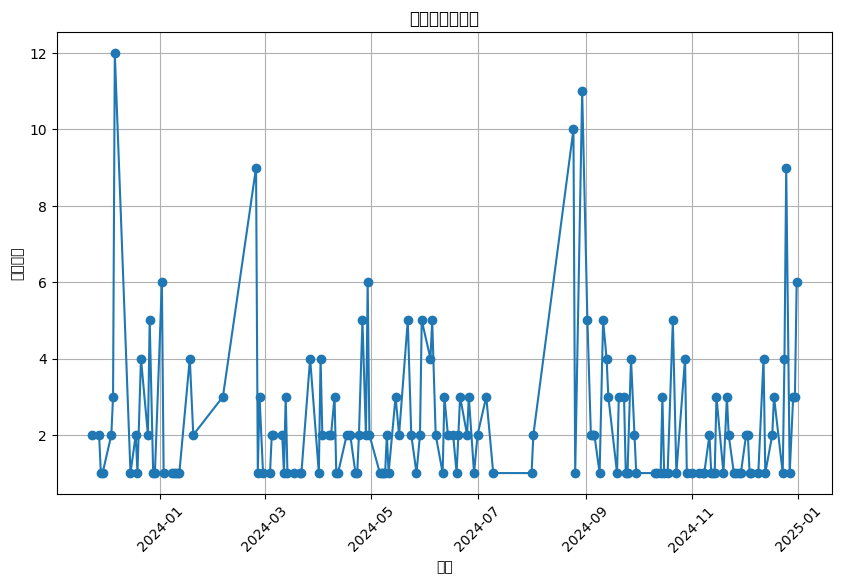

In [11]:
import matplotlib.pyplot as plt

# 绘制每日通知数量的折线图
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='line', marker='o')
plt.title('每天的通知数量')
plt.xlabel('日期')
plt.xticks(rotation=45)
plt.ylabel('通知数量')
plt.grid(True)

plt.show()

教学运行月下载次数分布

In [35]:
df = pd.read_csv(r'D:\code\教务通知.csv')

df['日期'] = pd.to_datetime(df['日期'])

# 筛选出教学运行相关的数据
tch_data = df[df['通知人'] == '教学运行']

# 提取月份信息并统计每月的附件下载次数
monthly_download_counts = tch_data.groupby(tch_data['日期'].dt.month)['附件下载次数'].sum()

# 输出结果
print("教学运行附件下载次数的月分布：")
print(monthly_download_counts)
monthly_download_counts.to_csv(r'D:\code\教学运行附件下载次数的月分布.csv', index=True, header=['附件下载次数'])

教学运行附件下载次数的月分布：
日期
1     4370.0
2     1036.0
3        0.0
4     3479.0
5     3252.0
6     4172.0
7        0.0
8        0.0
9      964.0
10    4253.0
11    6728.0
12    7096.0
Name: 附件下载次数, dtype: float64


findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

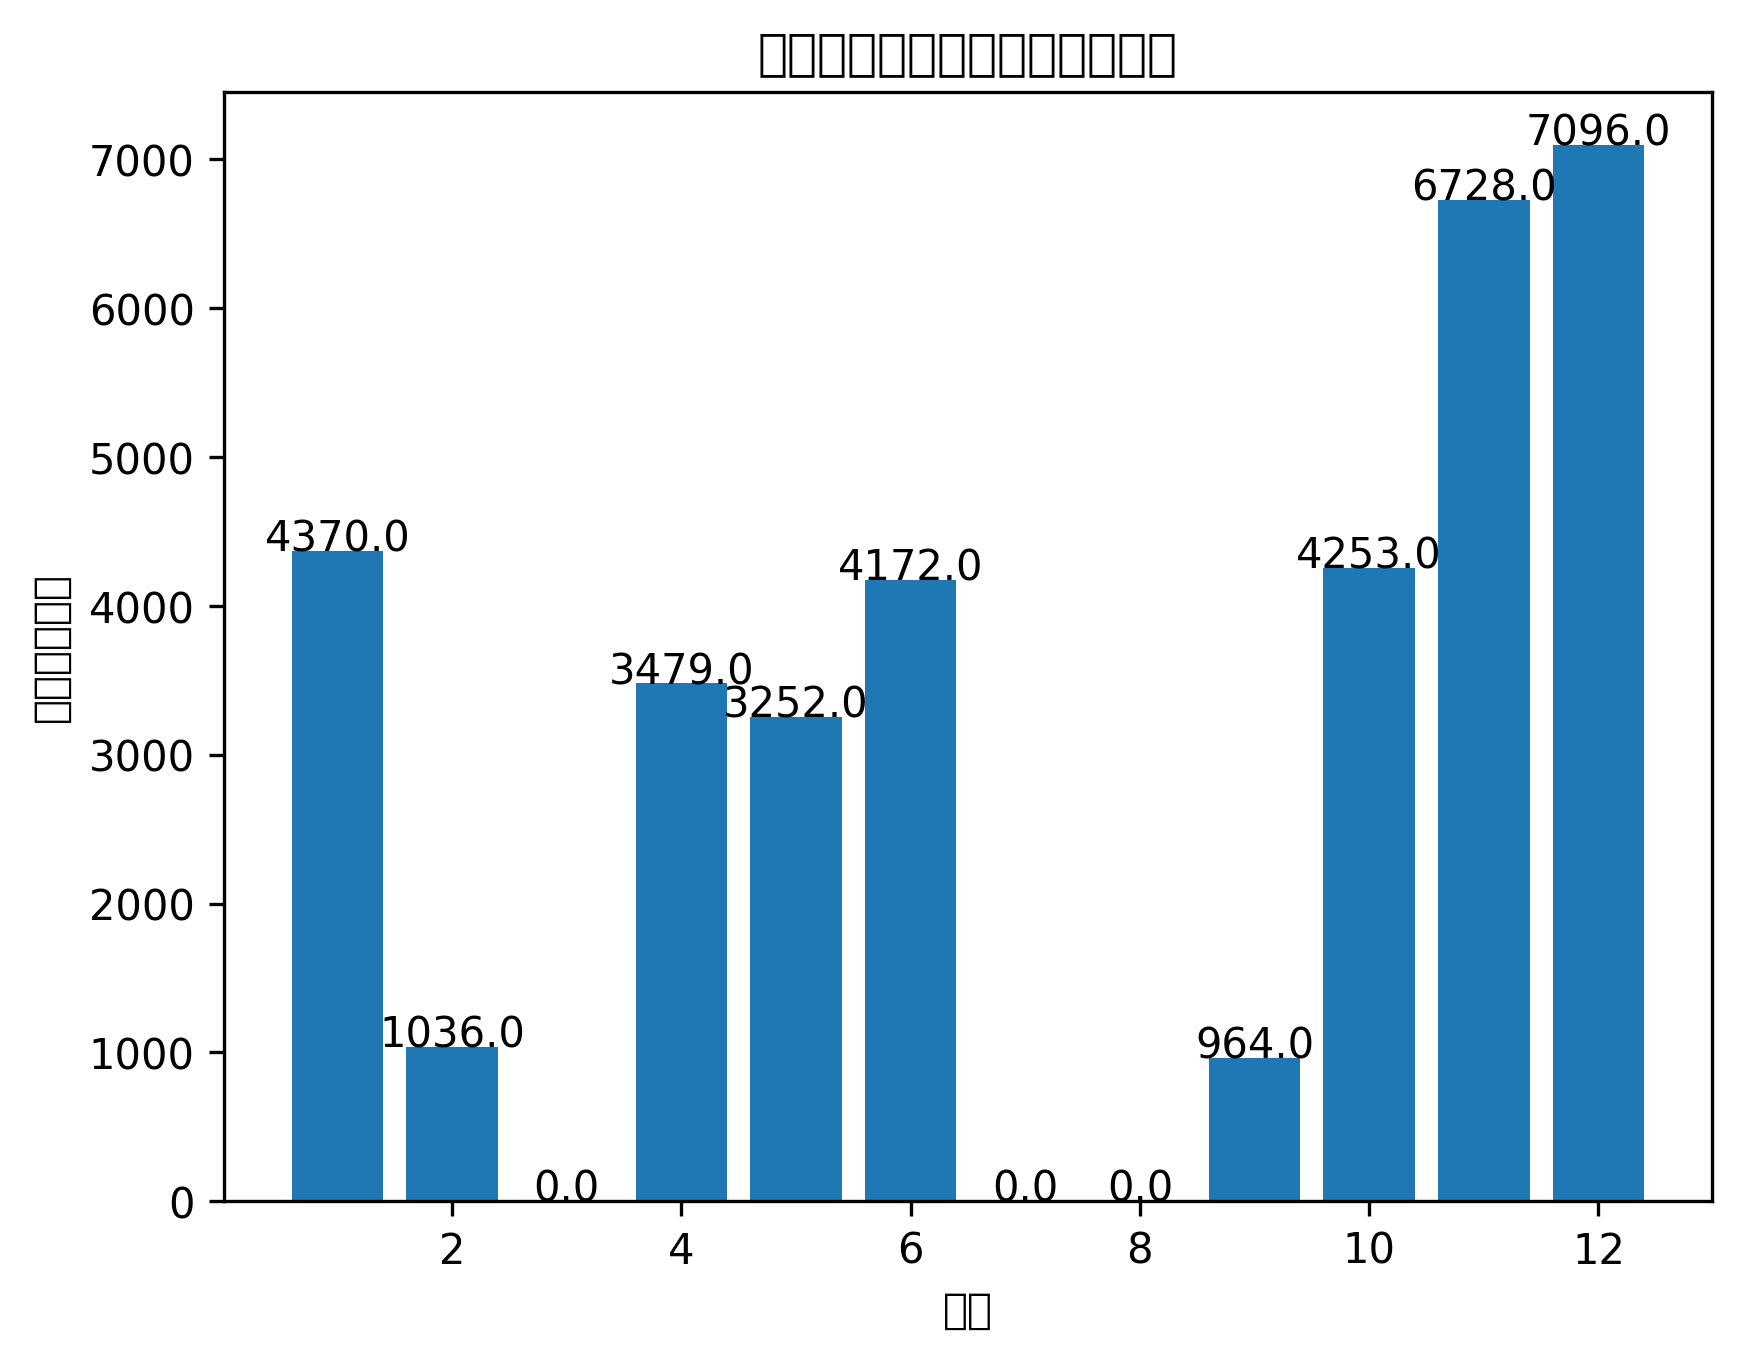

In [39]:
# 读取第一步保存的统计结果文件
monthly_data = pd.read_csv(r'D:\code\教学运行附件下载次数的月分布.csv')

# 绘制柱状图
plt.bar(monthly_data['日期'], monthly_data['附件下载次数'])
plt.xlabel('月份')
plt.ylabel('附件下载次数')
plt.title('教学运行附件下载次数的月分布')

for i, v in enumerate(monthly_data['附件下载次数']):
    plt.text(monthly_data['日期'][i], v, str(v), ha='center')

plt.show()